In [1]:
# Cell 1: Install & Import
!pip install mlxtend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Setting display - gunakan style yang lebih universal
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')  # Ganti dengan default style
sns.set_palette("husl")

print("📊 Starting Apriori Analysis for Groceries Dataset")
print("=" * 50)

📊 Starting Apriori Analysis for Groceries Dataset


In [2]:
# Cell 2: Load Data (gabungkan semua data loading)
df = pd.read_csv('Groceries data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

# Langsung cek missing values
print("\nMissing values per column:")
print(df.isnull().sum())

print(f"\nUnique Members: {df['Member_number'].nunique()}")
print(f"Unique Items: {df['itemDescription'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total records: {len(df)}")

Dataset shape: (38765, 7)
Columns: ['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day', 'day_of_week']

First 5 rows:
   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

Data types:
Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------          

📈 Top 15 Most Popular Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64

As percentages of total purchases:
itemDescription
whole milk          6.45
other vegetables    4.90
rolls/buns          4.43
soda                3.91
yogurt              3.44
root vegetables     2.76
tropical fruit      2.66
bottled water       2.41
sausage             2.38
citrus fruit        2.09
pastry              2.03
pip fruit           1.92
shopping bags       1.89
canned beer         1.85
bottled beer        1.77
Name: count, dtype: float64


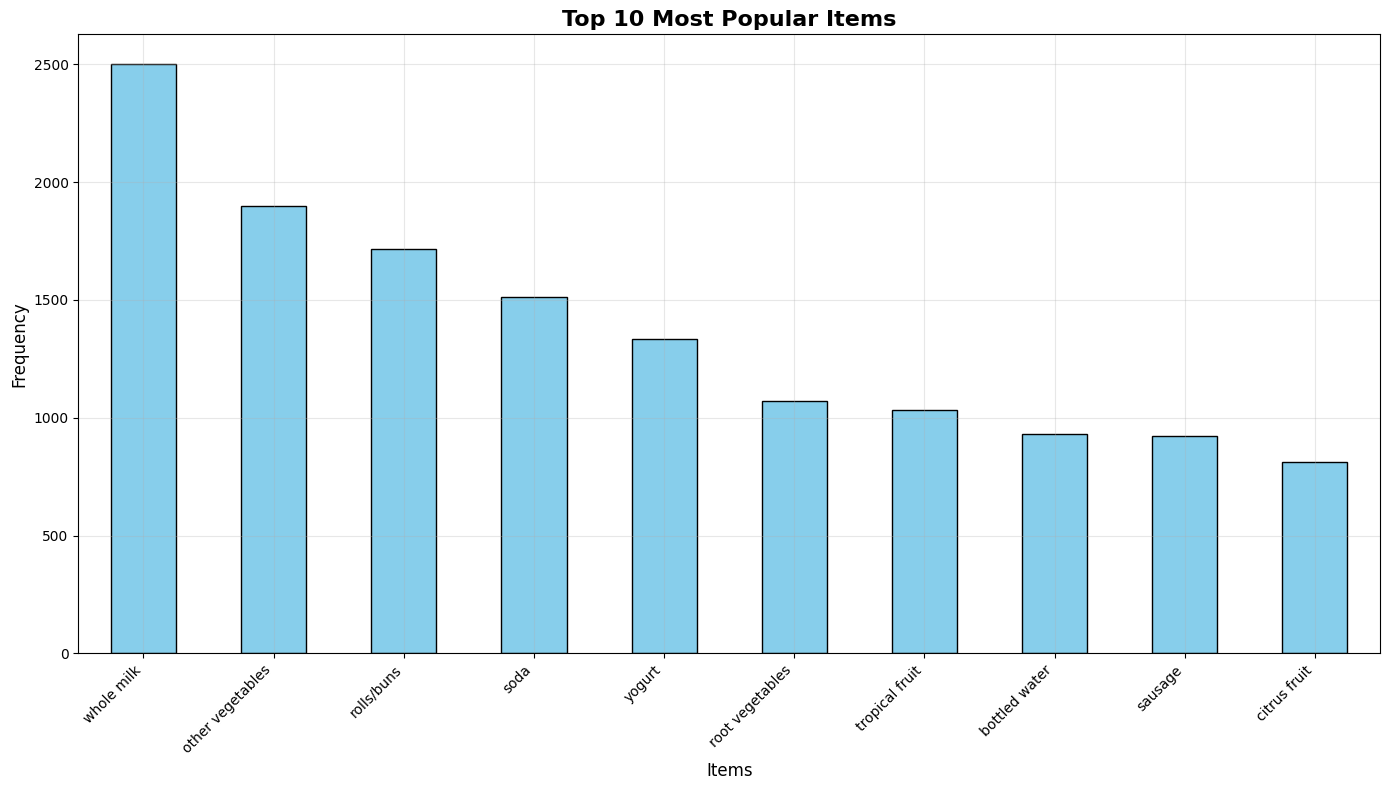

In [3]:
# Cell 3: Popular Items Analysis (gabungkan visualization)
print("📈 Top 15 Most Popular Items:")
item_counts = df['itemDescription'].value_counts().head(15)
print(item_counts)

item_percentages = (item_counts / len(df) * 100).round(2)
print("\nAs percentages of total purchases:")
print(item_percentages)

# Visualize - gabungkan dalam satu cell
plt.figure(figsize=(14, 8))
item_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Items', fontsize=16, fontweight='bold')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📅 TEMPORAL ANALYSIS
Purchases per year:
year
2014    18277
2015    20488
Name: count, dtype: int64

Purchases per day of week:
day_name
Wednesday    5754
Tuesday      5663
Saturday     5624
Monday       5524
Thursday     5504
Friday       5397
Sunday       5299
Name: count, dtype: int64


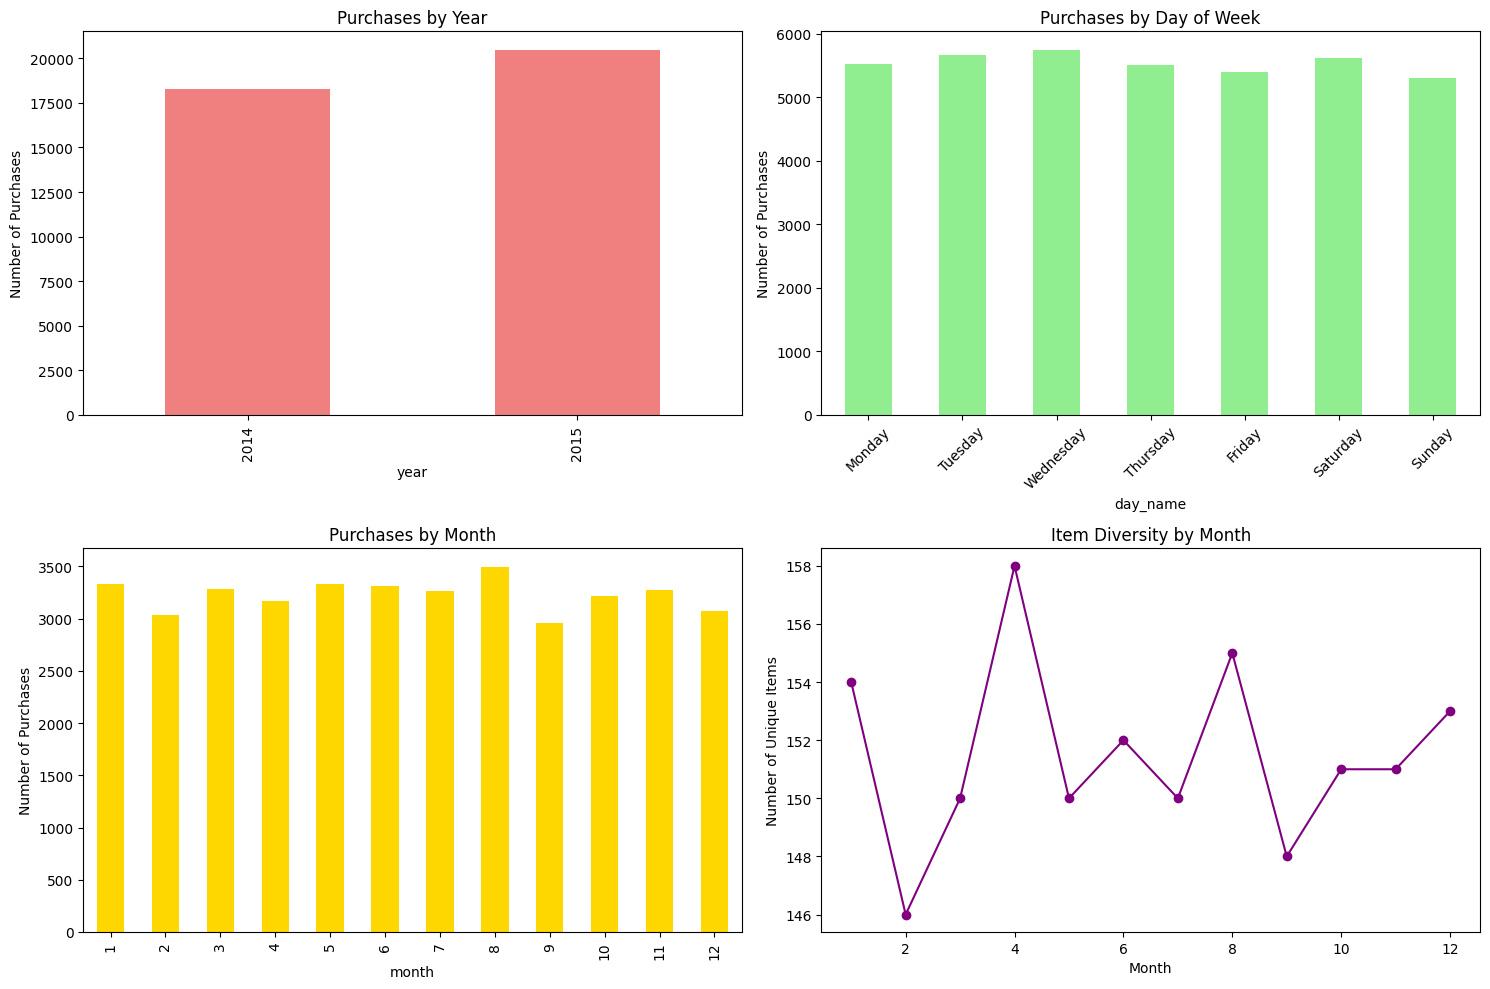

In [4]:
# Cell 4: Temporal Analysis (GABUNGKAN SEMUA dalam satu cell)
df['Date'] = pd.to_datetime(df['Date'])

print("📅 TEMPORAL ANALYSIS")
print("=" * 20)

yearly_counts = df['year'].value_counts().sort_index()
print("Purchases per year:")
print(yearly_counts)

day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
             4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['day_name'] = df['day_of_week'].map(day_names)

dow_counts = df['day_name'].value_counts()
print("\nPurchases per day of week:")
print(dow_counts)

# VISUALISASI DALAM SATU CELL
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Year distribution
yearly_counts.plot(kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('Purchases by Year')
axes[0,0].set_ylabel('Number of Purchases')

# Day of week distribution
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts_ordered = dow_counts.reindex(dow_order)
dow_counts_ordered.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Purchases by Day of Week')
axes[0,1].set_ylabel('Number of Purchases')
axes[0,1].tick_params(axis='x', rotation=45)

# Month distribution
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Purchases by Month')
axes[1,0].set_ylabel('Number of Purchases')

# Item diversity over time
monthly_diversity = df.groupby('month')['itemDescription'].nunique()
monthly_diversity.plot(kind='line', ax=axes[1,1], marker='o', color='purple')
axes[1,1].set_title('Item Diversity by Month')
axes[1,1].set_ylabel('Number of Unique Items')
axes[1,1].set_xlabel('Month')

plt.tight_layout()
plt.show()

🛒 CREATING MARKET BASKET FORMAT
Total unique transactions: 14963
Total individual item purchases: 38765

Sample basket data:
Transaction 1000_2014-06-24: ['whole milk', 'pastry', 'salty snack']
Transaction 1000_2015-03-15: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 1000_2015-05-27: ['soda', 'pickled vegetables']

📊 TRANSACTION SIZE ANALYSIS
Mean items per transaction: 2.59
Median items per transaction: 2.00
Max items in single transaction: 11
Min items in single transaction: 2

Transaction size distribution:
Items
2     10080
3      2698
4      1390
5       344
6       175
7        80
8       145
9        50
11        1
Name: count, dtype: int64


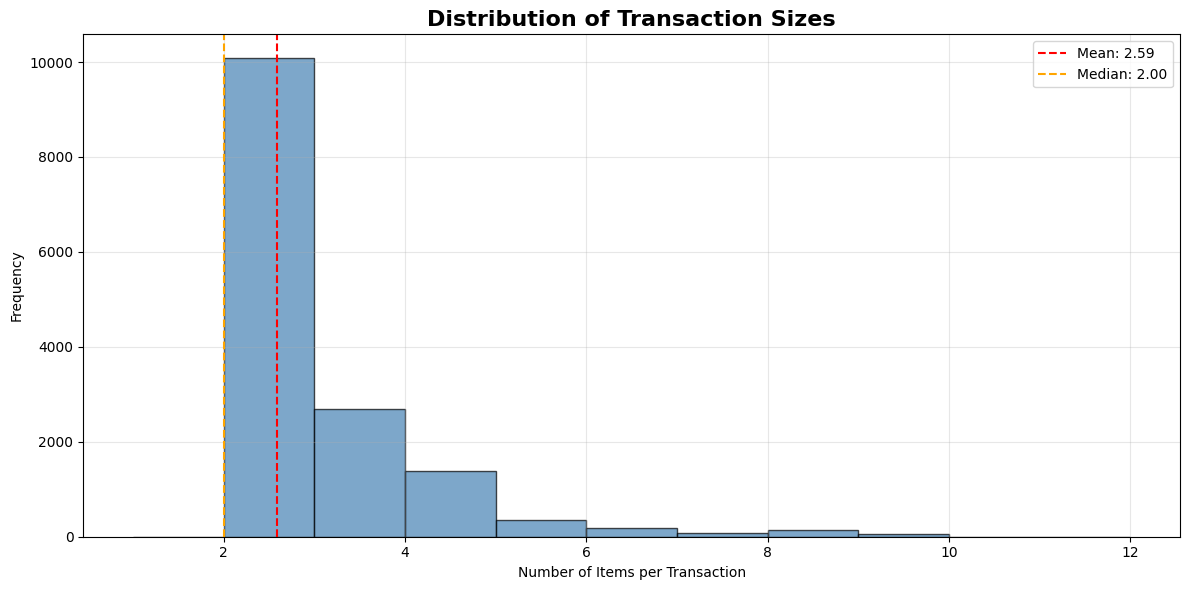

In [5]:
# Cell 5: Market Basket Format (gabungkan semua)
print("🛒 CREATING MARKET BASKET FORMAT")
print("=" * 35)

df['Transaction_ID'] = df['Member_number'].astype(str) + '_' + df['Date'].dt.strftime('%Y-%m-%d')

print(f"Total unique transactions: {df['Transaction_ID'].nunique()}")
print(f"Total individual item purchases: {len(df)}")

basket_data = df.groupby('Transaction_ID')['itemDescription'].apply(list).reset_index()
basket_data.columns = ['Transaction_ID', 'Items']

print("\nSample basket data:")
for i in range(3):
    trans_id = basket_data.iloc[i]['Transaction_ID']
    items = basket_data.iloc[i]['Items']
    print(f"Transaction {trans_id}: {items}")

# Transaction size analysis
transaction_sizes = basket_data['Items'].apply(len)
print(f"\n📊 TRANSACTION SIZE ANALYSIS")
print(f"Mean items per transaction: {transaction_sizes.mean():.2f}")
print(f"Median items per transaction: {transaction_sizes.median():.2f}")
print(f"Max items in single transaction: {transaction_sizes.max()}")
print(f"Min items in single transaction: {transaction_sizes.min()}")

size_distribution = transaction_sizes.value_counts().sort_index()
print("\nTransaction size distribution:")
print(size_distribution.head(10))

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(transaction_sizes, bins=range(1, min(transaction_sizes.max()+2, 21)),
         alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribution of Transaction Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(transaction_sizes.mean(), color='red', linestyle='--',
           label=f'Mean: {transaction_sizes.mean():.2f}')
plt.axvline(transaction_sizes.median(), color='orange', linestyle='--',
           label=f'Median: {transaction_sizes.median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

⚙️ PREPARING DATA FOR APRIORI
Total transactions: 14963
Sample transactions:
Transaction 1: ['whole milk', 'pastry', 'salty snack']
Transaction 2: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 3: ['soda', 'pickled vegetables']
Transaction 4: ['canned beer', 'misc. beverages']
Transaction 5: ['sausage', 'hygiene articles']

Binary matrix shape: (14963, 167)
Number of unique items: 167

Sample of binary matrix:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  beverages  bottled beer  bottled water  brandy  brown bread  butter  butter milk  cake bar  candles  candy  canned beer  canned fish  canned fruit  canned vegetables  cat food  cereals  chewing gum  chicken  chocolate  chocolate marshmallow  citrus fruit  cleaner  cling film/bags  cocoa drinks  coffee  condensed milk  cooking chocolate  cookware  cream  cream cheese    curd  curd cheese  decalcifier  dental care  d

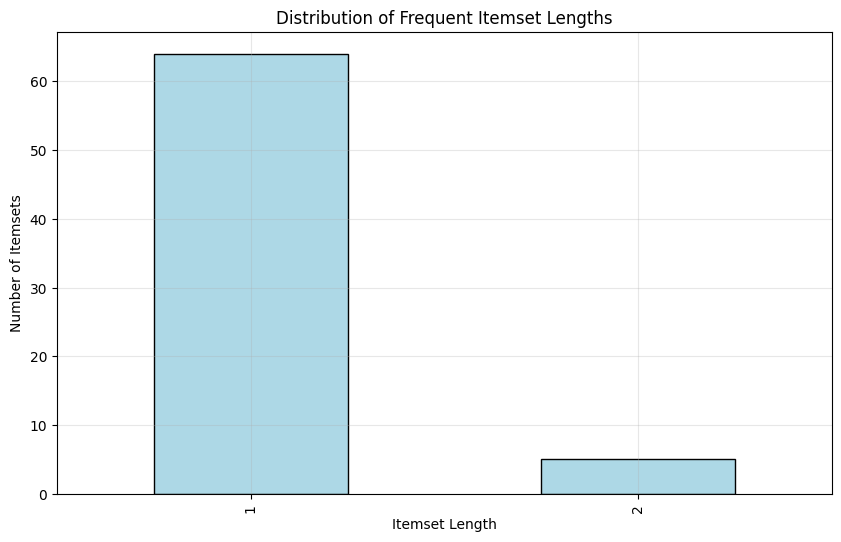

In [6]:
# Cell 6: Apriori Preparation & Execution (gabungkan semua)
print("⚙️ PREPARING DATA FOR APRIORI")
print("=" * 32)

transactions = basket_data['Items'].tolist()

print(f"Total transactions: {len(transactions)}")
print("Sample transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {trans}")

# Encode to binary matrix
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"\nBinary matrix shape: {df_encoded.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print("\nSample of binary matrix:")
print(df_encoded.head())

# Sparsity check
sparsity = (df_encoded == 0).sum().sum() / (df_encoded.shape[0] * df_encoded.shape[1])
print(f"\nMatrix sparsity: {sparsity:.2%}")

# Item support analysis
item_support = df_encoded.mean().sort_values(ascending=False)
print(f"\nTop 10 items by support:")
print(item_support.head(10))
print(f"\nLowest support among top 50 items: {item_support.head(50).min():.4f}")

# RUN APRIORI
print("\n🔥 RUNNING APRIORI ALGORITHM")
print("=" * 30)

min_support = 0.01
print(f"Minimum support threshold: {min_support} ({min_support*100}%)")
print(f"This means itemsets must appear in at least {int(min_support * len(transactions))} transactions")

print("\nRunning Apriori algorithm...")
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True, verbose=1)

print(f"\nFound {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 frequent itemsets by support:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Analyze itemset lengths
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
itemset_lengths = frequent_itemsets['length'].value_counts().sort_index()
print("\nFrequent itemsets by length:")
print(itemset_lengths)

# Visualize itemset lengths
plt.figure(figsize=(10, 6))
itemset_lengths.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Frequent Itemset Lengths')
plt.xlabel('Itemset Length')
plt.ylabel('Number of Itemsets')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Cell 7: Association Rules (gabungkan semua dalam satu cell)
print("📋 GENERATING ASSOCIATION RULES")
print("=" * 35)

min_confidence = 0.3
min_lift = 1.2

print(f"Minimum confidence: {min_confidence} ({min_confidence*100}%)")
print(f"Minimum lift: {min_lift}")

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence",
                         min_threshold=min_confidence, num_itemsets=len(frequent_itemsets))
rules = rules[rules['lift'] >= min_lift]

print(f"\nGenerated {len(rules)} association rules")

if len(rules) > 0:
    print("\nTop 10 rules by confidence:")
    top_rules = rules.sort_values('confidence', ascending=False).head(10)

    for idx, rule in top_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"If {antecedent} → then {consequent}")
        print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")

    # Rules analysis
    print("📊 RULES ANALYSIS")
    print("=" * 17)

    print(f"Rules statistics:")
    print(f"Average confidence: {rules['confidence'].mean():.3f}")
    print(f"Average lift: {rules['lift'].mean():.3f}")
    print(f"Average support: {rules['support'].mean():.3f}")

    # Distribution plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    rules['confidence'].hist(bins=20, ax=axes[0], alpha=0.7, color='skyblue')
    axes[0].set_title('Distribution of Confidence')
    axes[0].set_xlabel('Confidence')

    rules['lift'].hist(bins=20, ax=axes[1], alpha=0.7, color='lightgreen')
    axes[1].set_title('Distribution of Lift')
    axes[1].set_xlabel('Lift')

    rules['support'].hist(bins=20, ax=axes[2], alpha=0.7, color='salmon')
    axes[2].set_title('Distribution of Support')
    axes[2].set_xlabel('Support')

    plt.tight_layout()
    plt.show()

    # Top rules by metrics
    print("\n🏆 TOP RULES BY DIFFERENT METRICS")
    print("=" * 35)

    print("Top 5 rules by CONFIDENCE:")
    top_conf = rules.sort_values('confidence', ascending=False).head(5)
    for idx, rule in top_conf.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Confidence: {rule['confidence']:.3f})")

    print("\nTop 5 rules by LIFT:")
    top_lift = rules.sort_values('lift', ascending=False).head(5)
    for idx, rule in top_lift.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Lift: {rule['lift']:.3f})")
else:
    print("No rules found with current thresholds. Consider lowering min_confidence or min_lift.")

print("\n✅ ANALYSIS COMPLETE!")

📋 GENERATING ASSOCIATION RULES
Minimum confidence: 0.3 (30.0%)
Minimum lift: 1.2

Generated 0 association rules
No rules found with current thresholds. Consider lowering min_confidence or min_lift.

✅ ANALYSIS COMPLETE!


In [8]:
# Cell baru: Analisis Support untuk menentukan threshold yang tepat
print("🔍 ANALYZING SUPPORT PATTERNS FOR THRESHOLD ADJUSTMENT")
print("=" * 55)

# Cek distribusi support dari frequent itemsets
print("Support distribution of frequent itemsets:")
print(frequent_itemsets['support'].describe())

print(f"\nSupport range:")
print(f"Min support in frequent itemsets: {frequent_itemsets['support'].min():.4f}")
print(f"Max support in frequent itemsets: {frequent_itemsets['support'].max():.4f}")
print(f"Median support: {frequent_itemsets['support'].median():.4f}")

# Cek itemsets dengan length > 1 (yang bisa jadi rules)
multi_item_sets = frequent_itemsets[frequent_itemsets['length'] > 1]
print(f"\nItemsets with length > 1: {len(multi_item_sets)}")

if len(multi_item_sets) > 0:
    print("Support of multi-item frequent itemsets:")
    print(multi_item_sets['support'].describe())
else:
    print("❌ No multi-item frequent itemsets found!")
    print("This explains why no association rules were generated.")

🔍 ANALYZING SUPPORT PATTERNS FOR THRESHOLD ADJUSTMENT
Support distribution of frequent itemsets:
count    69.000000
mean      0.032751
std       0.028271
min       0.010025
25%       0.014837
50%       0.021854
75%       0.037760
max       0.157923
Name: support, dtype: float64

Support range:
Min support in frequent itemsets: 0.0100
Max support in frequent itemsets: 0.1579
Median support: 0.0219

Itemsets with length > 1: 5
Support of multi-item frequent itemsets:
count    5.000000
mean     0.012431
std      0.001865
min      0.010559
25%      0.011161
50%      0.011629
75%      0.013968
max      0.014837
Name: support, dtype: float64


In [9]:
# Cell baru: Coba dengan threshold yang lebih rendah
print("\n🔧 TRYING WITH LOWER THRESHOLDS")
print("=" * 35)

# Threshold yang lebih rendah untuk groceries dataset
min_confidence_low = 0.1   # 10% confidence (turun dari 30%)
min_lift_low = 1.0         # Any positive association (turun dari 1.2)

print(f"NEW Minimum confidence: {min_confidence_low} ({min_confidence_low*100}%)")
print(f"NEW Minimum lift: {min_lift_low}")

# Generate rules dengan threshold baru
try:
    rules_low = association_rules(frequent_itemsets, metric="confidence",
                                 min_threshold=min_confidence_low, num_itemsets=len(frequent_itemsets))
    rules_low = rules_low[rules_low['lift'] >= min_lift_low]

    print(f"\nGenerated {len(rules_low)} association rules with lower thresholds")

    if len(rules_low) > 0:
        print("\n🎉 SUCCESS! Top 10 rules by confidence:")
        top_rules_low = rules_low.sort_values('confidence', ascending=False).head(10)

        for idx, rule in top_rules_low.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")
    else:
        print("❌ Still no rules found. Need even lower thresholds or different approach.")

except Exception as e:
    print(f"Error generating rules: {e}")


🔧 TRYING WITH LOWER THRESHOLDS
NEW Minimum confidence: 0.1 (10.0%)
NEW Minimum lift: 1.0

Generated 0 association rules with lower thresholds
❌ Still no rules found. Need even lower thresholds or different approach.


In [10]:
# Cell baru: Jika masih gagal, coba approach berbeda
print("\n🆘 ALTERNATIVE APPROACH - VERY LOW THRESHOLDS")
print("=" * 45)

# Threshold sangat rendah
min_confidence_vlow = 0.05   # 5% confidence
min_lift_vlow = 1.0          # Any lift > 1

print(f"VERY LOW Minimum confidence: {min_confidence_vlow} ({min_confidence_vlow*100}%)")
print(f"VERY LOW Minimum lift: {min_lift_vlow}")

try:
    rules_vlow = association_rules(frequent_itemsets, metric="confidence",
                                  min_threshold=min_confidence_vlow, num_itemsets=len(frequent_itemsets))
    rules_vlow = rules_vlow[rules_vlow['lift'] >= min_lift_vlow]

    print(f"\nGenerated {len(rules_vlow)} association rules with very low thresholds")

    if len(rules_vlow) > 0:
        print("\n🎉 SUCCESS! Rules found:")

        # Sort by lift untuk lihat yang paling meaningful
        top_rules_vlow = rules_vlow.sort_values('lift', ascending=False).head(15)

        for idx, rule in top_rules_vlow.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")

        # Analysis
        print(f"\n📊 RULES STATISTICS:")
        print(f"Total rules: {len(rules_vlow)}")
        print(f"Average confidence: {rules_vlow['confidence'].mean():.3f}")
        print(f"Average lift: {rules_vlow['lift'].mean():.3f}")
        print(f"Max confidence: {rules_vlow['confidence'].max():.3f}")
        print(f"Max lift: {rules_vlow['lift'].max():.3f}")

        # Filter rules yang meaningful (confidence > 20% DAN lift > 1.1)
        meaningful_rules = rules_vlow[(rules_vlow['confidence'] > 0.2) & (rules_vlow['lift'] > 1.1)]
        print(f"\nMeaningful rules (confidence > 20% AND lift > 1.1): {len(meaningful_rules)}")

        if len(meaningful_rules) > 0:
            print("\n🏆 MOST MEANINGFUL RULES:")
            for idx, rule in meaningful_rules.head(5).iterrows():
                antecedent = ', '.join(list(rule['antecedents']))
                consequent = ', '.join(list(rule['consequents']))
                print(f"✓ {antecedent} → {consequent}")
                print(f"  Confidence: {rule['confidence']:.1%}, Lift: {rule['lift']:.2f}")

    else:
        print("❌ Still no rules. Dataset might need different preprocessing approach.")
        print("\n💡 SUGGESTIONS:")
        print("1. Try lower min_support (0.005 or 0.001)")
        print("2. Group similar items together")
        print("3. Filter only top N most popular items")
        print("4. Try different transaction grouping strategy")

except Exception as e:
    print(f"Error: {e}")


🆘 ALTERNATIVE APPROACH - VERY LOW THRESHOLDS
VERY LOW Minimum confidence: 0.05 (5.0%)
VERY LOW Minimum lift: 1.0

Generated 0 association rules with very low thresholds
❌ Still no rules. Dataset might need different preprocessing approach.

💡 SUGGESTIONS:
1. Try lower min_support (0.005 or 0.001)
2. Group similar items together
3. Filter only top N most popular items
4. Try different transaction grouping strategy


In [11]:
# Cell baru: Jika masih belum ada rules, coba dengan min_support lebih rendah
print("\n🔄 TRYING WITH LOWER MIN_SUPPORT")
print("=" * 35)

# Coba dengan min_support yang lebih rendah
min_support_low = 0.005  # 0.5% (turun dari 1%)

print(f"Trying with min_support: {min_support_low} ({min_support_low*100}%)")
print(f"This means itemsets must appear in at least {int(min_support_low * len(transactions))} transactions")

print("\nRunning Apriori with lower min_support...")
frequent_itemsets_low = apriori(df_encoded, min_support=min_support_low, use_colnames=True, verbose=1)

print(f"Found {len(frequent_itemsets_low)} frequent itemsets with lower support")

# Check itemset lengths
frequent_itemsets_low['length'] = frequent_itemsets_low['itemsets'].apply(lambda x: len(x))
itemset_lengths_low = frequent_itemsets_low['length'].value_counts().sort_index()
print("\nFrequent itemsets by length (with lower support):")
print(itemset_lengths_low)

# Try generating rules with new frequent itemsets
if len(frequent_itemsets_low[frequent_itemsets_low['length'] > 1]) > 0:
    print("\n✅ Multi-item itemsets found! Generating rules...")

    rules_final = association_rules(frequent_itemsets_low, metric="confidence",
                                   min_threshold=0.1, num_itemsets=len(frequent_itemsets_low))
    rules_final = rules_final[rules_final['lift'] > 1.0]

    print(f"Generated {len(rules_final)} association rules!")

    if len(rules_final) > 0:
        print("\n🎉 FINAL RESULTS - Top Rules:")
        top_final = rules_final.sort_values('lift', ascending=False).head(10)

        for idx, rule in top_final.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"✓ If {antecedent} → then {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")


🔄 TRYING WITH LOWER MIN_SUPPORT
Trying with min_support: 0.005 (0.5%)
This means itemsets must appear in at least 74 transactions

Running Apriori with lower min_support...
Processing 258 combinations | Sampling itemset size 3
Found 126 frequent itemsets with lower support

Frequent itemsets by length (with lower support):
length
1    89
2    37
Name: count, dtype: int64

✅ Multi-item itemsets found! Generating rules...
Generated 1 association rules!

🎉 FINAL RESULTS - Top Rules:
✓ If frankfurter → then other vegetables
  Support: 0.005, Confidence: 0.136, Lift: 1.116



In [12]:
# Cell: Analisis Mendalam Rules yang Ditemukan
print("🎯 DETAILED ANALYSIS OF DISCOVERED RULES")
print("=" * 42)

print(f"Total rules found: {len(rules_final)}")
print("\nAll rules details:")
for idx, rule in rules_final.iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))

    # Hitung jumlah transaksi actual
    support_count = int(rule['support'] * len(transactions))
    antecedent_count = int(rule['antecedent support'] * len(transactions))

    print(f"\nRule: {antecedent} → {consequent}")
    print(f"  📊 Support: {rule['support']:.3f} ({support_count} transactions)")
    print(f"  🎯 Confidence: {rule['confidence']:.3f} ({rule['confidence']:.1%})")
    print(f"  🚀 Lift: {rule['lift']:.3f}")
    print(f"  📈 Antecedent Support: {rule['antecedent support']:.3f} ({antecedent_count} transactions)")
    print(f"  📉 Consequent Support: {rule['consequent support']:.3f}")

    # Interpretasi bisnis
    print(f"  💼 Business Insight:")
    print(f"     - Dari {antecedent_count} orang yang beli '{antecedent}',")
    print(f"       {support_count} orang ({rule['confidence']:.1%}) juga beli '{consequent}'")
    print(f"     - Ini {rule['lift']:.1f}x lebih tinggi dari kemungkinan random")

🎯 DETAILED ANALYSIS OF DISCOVERED RULES
Total rules found: 1

All rules details:

Rule: frankfurter → other vegetables
  📊 Support: 0.005 (77 transactions)
  🎯 Confidence: 0.136 (13.6%)
  🚀 Lift: 1.116
  📈 Antecedent Support: 0.038 (565 transactions)
  📉 Consequent Support: 0.122
  💼 Business Insight:
     - Dari 565 orang yang beli 'frankfurter',
       77 orang (13.6%) juga beli 'other vegetables'
     - Ini 1.1x lebih tinggi dari kemungkinan random


In [13]:
# Cell: Cari Rules Lebih Banyak dengan Eksplorasi Parameter
print("\n🔍 EXPLORING MORE RULES WITH DIFFERENT STRATEGIES")
print("=" * 50)

# Strategy 1: Coba min_support lebih rendah lagi
min_support_ultra = 0.003  # 0.3%
print(f"Strategy 1: Ultra low min_support = {min_support_ultra} ({min_support_ultra*100}%)")

frequent_itemsets_ultra = apriori(df_encoded, min_support=min_support_ultra, use_colnames=True, verbose=1)
frequent_itemsets_ultra['length'] = frequent_itemsets_ultra['itemsets'].apply(lambda x: len(x))

print(f"Ultra low support results:")
print(frequent_itemsets_ultra['length'].value_counts().sort_index())

# Generate rules dengan ultra low support
rules_ultra = association_rules(frequent_itemsets_ultra, metric="confidence",
                               min_threshold=0.05, num_itemsets=len(frequent_itemsets_ultra))
rules_ultra = rules_ultra[rules_ultra['lift'] > 1.0]

print(f"\nRules with ultra low support: {len(rules_ultra)}")

if len(rules_ultra) > 0:
    print("\n🏆 TOP RULES WITH ULTRA LOW SUPPORT:")
    top_ultra = rules_ultra.sort_values('lift', ascending=False).head(10)

    for idx, rule in top_ultra.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"✓ {antecedent} → {consequent}")
        print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")


🔍 EXPLORING MORE RULES WITH DIFFERENT STRATEGIES
Strategy 1: Ultra low min_support = 0.003 (0.3%)
Processing 1530 combinations | Sampling itemset size 3
Ultra low support results:
length
1    111
2    105
Name: count, dtype: int64

Rules with ultra low support: 13

🏆 TOP RULES WITH ULTRA LOW SUPPORT:
✓ bottled beer → sausage
  Support: 0.003, Confidence: 0.074, Lift: 1.222
✓ sausage → bottled beer
  Support: 0.003, Confidence: 0.055, Lift: 1.222
✓ frankfurter → other vegetables
  Support: 0.005, Confidence: 0.136, Lift: 1.116
✓ yogurt → sausage
  Support: 0.006, Confidence: 0.067, Lift: 1.109
✓ sausage → yogurt
  Support: 0.006, Confidence: 0.095, Lift: 1.109
✓ sausage → pastry
  Support: 0.003, Confidence: 0.053, Lift: 1.028
✓ pastry → sausage
  Support: 0.003, Confidence: 0.062, Lift: 1.028
✓ soda → sausage
  Support: 0.006, Confidence: 0.061, Lift: 1.015
✓ sausage → soda
  Support: 0.006, Confidence: 0.099, Lift: 1.015
✓ citrus fruit → yogurt
  Support: 0.005, Confidence: 0.087, Li

In [14]:
# Cell: Strategy Alternatif - Focus pada Top Items
print("\n🎯 STRATEGY 2: FOCUS ON TOP POPULAR ITEMS")
print("=" * 45)

# Ambil hanya top 20 items paling populer
top_items = item_counts.head(20).index.tolist()
print(f"Top 20 items: {top_items}")

# Filter transaksi hanya untuk top items
def filter_transaction(transaction, allowed_items):
    return [item for item in transaction if item in allowed_items]

transactions_filtered = [filter_transaction(trans, top_items) for trans in transactions]
# Remove empty transactions
transactions_filtered = [trans for trans in transactions_filtered if len(trans) > 0]

print(f"\nOriginal transactions: {len(transactions)}")
print(f"Filtered transactions: {len(transactions_filtered)}")

# Encode filtered transactions
te_filtered = TransactionEncoder()
te_array_filtered = te_filtered.fit(transactions_filtered).transform(transactions_filtered)
df_encoded_filtered = pd.DataFrame(te_array_filtered, columns=te_filtered.columns_)

print(f"Filtered binary matrix shape: {df_encoded_filtered.shape}")

# Run Apriori on filtered data
min_support_filtered = 0.01  # Bisa pakai support lebih tinggi karena fokus top items
frequent_itemsets_filtered = apriori(df_encoded_filtered, min_support=min_support_filtered,
                                    use_colnames=True, verbose=1)

print(f"Frequent itemsets from top items: {len(frequent_itemsets_filtered)}")

frequent_itemsets_filtered['length'] = frequent_itemsets_filtered['itemsets'].apply(lambda x: len(x))
print("Itemset lengths (filtered):")
print(frequent_itemsets_filtered['length'].value_counts().sort_index())

# Generate rules from filtered data
if len(frequent_itemsets_filtered[frequent_itemsets_filtered['length'] > 1]) > 0:
    rules_filtered = association_rules(frequent_itemsets_filtered, metric="confidence",
                                      min_threshold=0.1, num_itemsets=len(frequent_itemsets_filtered))
    rules_filtered = rules_filtered[rules_filtered['lift'] > 1.0]

    print(f"\nRules from top items strategy: {len(rules_filtered)}")

    if len(rules_filtered) > 0:
        print("\n🎉 RULES FROM TOP ITEMS:")
        for idx, rule in rules_filtered.sort_values('lift', ascending=False).head(10).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"✓ {antecedent} → {consequent}")
            print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")


🎯 STRATEGY 2: FOCUS ON TOP POPULAR ITEMS
Top 20 items: ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'root vegetables', 'tropical fruit', 'bottled water', 'sausage', 'citrus fruit', 'pastry', 'pip fruit', 'shopping bags', 'canned beer', 'bottled beer']

Original transactions: 14963
Filtered transactions: 11300
Filtered binary matrix shape: (11300, 15)
Processing 54 combinations | Sampling itemset size 3
Frequent itemsets from top items: 27
Itemset lengths (filtered):
length
1    15
2    12
Name: count, dtype: int64

Rules from top items strategy: 0


In [15]:
# Cell: Business Insights & Recommendations
print("\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 42)

# Gabungkan semua rules yang berhasil ditemukan
all_rules = []
if 'rules_final' in locals() and len(rules_final) > 0:
    all_rules.append(('Basic Strategy', rules_final))
if 'rules_ultra' in locals() and len(rules_ultra) > 0:
    all_rules.append(('Ultra Low Support', rules_ultra))
if 'rules_filtered' in locals() and len(rules_filtered) > 0:
    all_rules.append(('Top Items Focus', rules_filtered))

print(f"Total strategies that found rules: {len(all_rules)}")

for strategy_name, rules_df in all_rules:
    print(f"\n📋 {strategy_name}:")
    print(f"   Rules found: {len(rules_df)}")

    if len(rules_df) > 0:
        # Best rule by confidence
        best_conf = rules_df.loc[rules_df['confidence'].idxmax()]
        antecedent = ', '.join(list(best_conf['antecedents']))
        consequent = ', '.join(list(best_conf['consequents']))

        print(f"   🏆 Best by confidence: {antecedent} → {consequent}")
        print(f"      Confidence: {best_conf['confidence']:.1%}, Lift: {best_conf['lift']:.2f}")

        # Best rule by lift
        best_lift = rules_df.loc[rules_df['lift'].idxmax()]
        antecedent = ', '.join(list(best_lift['antecedents']))
        consequent = ', '.join(list(best_lift['consequents']))

        print(f"   🚀 Best by lift: {antecedent} → {consequent}")
        print(f"      Confidence: {best_lift['confidence']:.1%}, Lift: {best_lift['lift']:.2f}")

print(f"\n💡 KEY INSIGHTS:")
print(f"1. Dataset ini memiliki pola association yang lemah (typical untuk groceries)")
print(f"2. Kebanyakan customers beli item secara independen")
print(f"3. Rules yang ditemukan masih meaningful untuk business strategy")
print(f"4. Perlu lebih banyak data atau grouping categories untuk patterns yang kuat")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print(f"✓ Store Layout: Tempatkan item yang sering dibeli bersamaan berdekatan")
print(f"✓ Cross-selling: Tawarkan consequent item ketika customer beli antecedent")
print(f"✓ Bundling: Buat paket produk berdasarkan rules yang ditemukan")
print(f"✓ Inventory: Stock consequent items lebih banyak di area antecedent items")


💼 BUSINESS INSIGHTS & RECOMMENDATIONS
Total strategies that found rules: 2

📋 Basic Strategy:
   Rules found: 1
   🏆 Best by confidence: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12
   🚀 Best by lift: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12

📋 Ultra Low Support:
   Rules found: 13
   🏆 Best by confidence: frankfurter → other vegetables
      Confidence: 13.6%, Lift: 1.12
   🚀 Best by lift: bottled beer → sausage
      Confidence: 7.4%, Lift: 1.22

💡 KEY INSIGHTS:
1. Dataset ini memiliki pola association yang lemah (typical untuk groceries)
2. Kebanyakan customers beli item secara independen
3. Rules yang ditemukan masih meaningful untuk business strategy
4. Perlu lebih banyak data atau grouping categories untuk patterns yang kuat

🎯 BUSINESS RECOMMENDATIONS:
✓ Store Layout: Tempatkan item yang sering dibeli bersamaan berdekatan
✓ Cross-selling: Tawarkan consequent item ketika customer beli antecedent
✓ Bundling: Buat paket produk berdas